In [1]:
import pandas as pd

# Pre-process MovieLens' Movies dataset

In [2]:
df_ml_movies = pd.read_csv('datasets/movielens_original/movies.csv')
df_ml_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [3]:
df_ml_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
df_ml_movies[df_ml_movies['title'] == 'Inception (2010)']

,movieId,title,genres
14937,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX


In [5]:
df_ml_movies = df_ml_movies[['movieId', 'title']]
df_ml_movies.head()
# drop genre

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
df_ml_movies['title'].value_counts().head(30)

The Void (2016)                                                                 2
Seven Years Bad Luck (1921)                                                     2
Clear History (2013)                                                            2
Enron: The Smartest Guys in the Room (2005)                                     2
Deranged (2012)                                                                 2
Suckerfish (1999)                                                               2
Another World (2014)                                                            2
Little Man (2006)                                                               2
Hamlet (2000)                                                                   2
Contact (1992)                                                                  2
Operator (2015)                                                                 2
The Dream Team (2012)                                                           2
Dracula (1931)  

In [7]:
df_ml_movies[df_ml_movies['title'].str.contains('Fabian')]

,movieId,title
14716,78049,Adventures of Captain Fabian (1951)


# Standardise movie titles that start with "The"

In [8]:
df_ml_movies[df_ml_movies['title'].str.contains('Shawshank')]
#need to convert all movies with 'The'

,movieId,title
314,318,"Shawshank Redemption, The (1994)"


In [9]:
print(df_ml_movies[df_ml_movies['title'].str.contains(', The \(\d+')].head(50))
df_ml_with_the = df_ml_movies[df_ml_movies['title'].str.contains(', The \(\d+')]
df_ml_with_the

     movieId                                              title
10        11                     American President, The (1995)
49        50                         Usual Suspects, The (1995)
53        54                              Big Green, The (1995)
59        60                 Indian in the Cupboard, The (1995)
77        78                         Crossing Guard, The (1995)
78        79                                  Juror, The (1996)
103      105              Bridges of Madison County, The (1995)
115      117              Young Poisoner's Handbook, The (1995)
119      121                    Boys of St. Vincent, The (1992)
124      126                  NeverEnding Story III, The (1994)
136      138                             Neon Bible, The (1995)
139      141                               Birdcage, The (1996)
142      144                      Brothers McMullen, The (1995)
144      146                Amazing Panda Adventure, The (1995)
145      147                     Basketb

,movieId,title
10,11,"American President, The (1995)"
49,50,"Usual Suspects, The (1995)"
53,54,"Big Green, The (1995)"
59,60,"Indian in the Cupboard, The (1995)"
77,78,"Crossing Guard, The (1995)"
...,...,...
34765,146202,"Inside of the White Slave Traffic, The (1913)"
35759,148626,"Big Short, The (2015)"
38533,155026,"Office Wife, The (1930)"
39625,157625,"Whispering Chorus, The (1918)"


In [10]:
df_ml_without_the = df_ml_movies[~df_ml_movies['title'].str.contains(', The \(\d+')]
df_ml_without_the

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
62418,209157,We (2018)
62419,209159,Window of the Soul (2001)
62420,209163,Bad Poems (2018)
62421,209169,A Girl Thing (2001)


In [11]:
df_test = pd.concat([df_ml_without_the, df_ml_with_the])
df_test

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
34765,146202,"Inside of the White Slave Traffic, The (1913)"
35759,148626,"Big Short, The (2015)"
38533,155026,"Office Wife, The (1930)"
39625,157625,"Whispering Chorus, The (1918)"


In [12]:
raw_the = df_ml_with_the['title'].str.split(', The ',)
print(raw_the.head(15))
df_ml_with_the['new'] = 'The ' + raw_the.str[0] + ' ' + raw_the.str[1]
df_ml_with_the.head()

10            [American President, (1995)]
49                [Usual Suspects, (1995)]
53                     [Big Green, (1995)]
59        [Indian in the Cupboard, (1995)]
77                [Crossing Guard, (1995)]
78                         [Juror, (1996)]
103    [Bridges of Madison County, (1995)]
115    [Young Poisoner's Handbook, (1995)]
119          [Boys of St. Vincent, (1992)]
124        [NeverEnding Story III, (1994)]
136                   [Neon Bible, (1995)]
139                     [Birdcage, (1996)]
142            [Brothers McMullen, (1995)]
144      [Amazing Panda Adventure, (1995)]
145           [Basketball Diaries, (1995)]
Name: title, dtype: object


C:\Users\Kevan\AppData\Local\Temp/ipykernel_24848/2976948629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_with_the['new'] = 'The ' + raw_the.str[0] + ' ' + raw_the.str[1]


,movieId,title,new
10,11,"American President, The (1995)",The American President (1995)
49,50,"Usual Suspects, The (1995)",The Usual Suspects (1995)
53,54,"Big Green, The (1995)",The Big Green (1995)
59,60,"Indian in the Cupboard, The (1995)",The Indian in the Cupboard (1995)
77,78,"Crossing Guard, The (1995)",The Crossing Guard (1995)


In [13]:
df_ml_with_the.drop('new', axis=1, inplace=True)

C:\Users\Kevan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df_ml_with_the['title'] = 'The ' + raw_the.str[0] + ' ' + raw_the.str[1]
# df_ml_with_the = df_ml_with_the.drop('new', axis=1)
df_ml_with_the.head()

C:\Users\Kevan\AppData\Local\Temp/ipykernel_24848/889700230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_with_the['title'] = 'The ' + raw_the.str[0] + ' ' + raw_the.str[1]


,movieId,title
10,11,The American President (1995)
49,50,The Usual Suspects (1995)
53,54,The Big Green (1995)
59,60,The Indian in the Cupboard (1995)
77,78,The Crossing Guard (1995)


In [15]:
df_ml_movies = pd.concat([df_ml_without_the, df_ml_with_the])
df_ml_movies.sort_values(by=['movieId'], inplace=True)
df_ml_movies.head(15)
# We can see The American President (1995) on row 10 being in the correct format now

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


# Pre-Processing IMDB Web Scraped dataset

In [16]:
df_scraped = pd.read_csv('datasets/imdb_cleaned/Scraped_Cleaned.csv', index_col=0)
df_scraped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96567 entries, 0 to 113640
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            96567 non-null  object 
 1   runtime          95108 non-null  float64
 2   imdb_rating      96567 non-null  float64
 3   num_of_rating    96567 non-null  float64
 4   budget           20356 non-null  float64
 5   worldwide_gross  27409 non-null  object 
 6   origin           96297 non-null  object 
 7   cast             96567 non-null  object 
 8   director         96567 non-null  object 
 9   writer           96567 non-null  object 
 10  producer         96567 non-null  object 
 11  composer         96567 non-null  object 
 12  cinematographer  96567 non-null  object 
 13  editor           96567 non-null  object 
 14  year             82722 non-null  float64
 15  Action           96567 non-null  int64  
 16  Adult            96567 non-null  int64  
 17  Adventure  

In [17]:
df_scraped.head(10)

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,"$28,884,504",United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,"$1,006,234,167","United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...",...,0,0,0,0,0,0,0,0,0,0
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,0
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,"$101,209,702","Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']",...,0,0,0,0,0,0,0,0,0,0
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,"$213,928,762",United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...",...,0,0,0,0,0,0,0,0,0,0
5,Forrest Gump (1994),150.0,8.8,2100000.0,59719000.0,"$678,226,465",United States,"[""Tom Hanks,Rebecca Williams,Sally Field,Micha...",['Robert Zemeckis'],"['Winston Groom,Eric Roth']",...,0,0,0,0,0,0,0,0,0,0
6,The Matrix (1999),150.0,8.7,1900000.0,68405400.0,"$467,222,728","United States,Australia","[""Keanu Reeves,Laurence Fishburne,Carrie-Anne ...","['Lana Wachowski,Lilly Wachowski']","['Lilly Wachowski,Lana Wachowski']",...,0,0,0,0,0,0,0,0,0,0
8,The Lord of the Rings: The Fellowship of the R...,180.0,8.8,1900000.0,100979400.0,"$898,204,420","New Zealand,United States","[""Alan Howard,Noel Appleby,Sean Astin,Sala Bak...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,0,0,0
10,The Godfather (1972),180.0,9.2,1900000.0,6514800.0,"$250,341,816",United States,"['Marlon Brando,Al Pacino,James Caan,Richard S...",['Francis Ford Coppola'],"['Mario Puzo,Francis Ford Coppola,Mario Puzo']",...,0,0,0,0,0,0,0,0,0,0
11,The Lord of the Rings: The Return of the King ...,NaN,9.0,1900000.0,102065200.0,"$1,146,457,748","New Zealand,United States","['Noel Appleby,Ali Astin,Sean Astin,David Asto...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_scraped[df_scraped['title'].str.contains('The Dream Team')]

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan
43989,The Dream Team (2012),90.0,8.3,906.0,1085.8,NaN,United States,"['Charles Barkley,Larry Bird,Clyde Drexler,Pat...",['Zak Levitt'],['nan'],...,0,0,0,0,0,0,0,0,0,1


In [19]:
# find rows which are NOT TV shows
df_scraped[~df_scraped.title.str.contains('–')].head(15)

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,"$28,884,504",United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,"$1,006,234,167","United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...",...,0,0,0,0,0,0,0,0,0,0
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,0
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,"$101,209,702","Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']",...,0,0,0,0,0,0,0,0,0,0
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,"$213,928,762",United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...",...,0,0,0,0,0,0,0,0,0,0
5,Forrest Gump (1994),150.0,8.8,2100000.0,59719000.0,"$678,226,465",United States,"[""Tom Hanks,Rebecca Williams,Sally Field,Micha...",['Robert Zemeckis'],"['Winston Groom,Eric Roth']",...,0,0,0,0,0,0,0,0,0,0
6,The Matrix (1999),150.0,8.7,1900000.0,68405400.0,"$467,222,728","United States,Australia","[""Keanu Reeves,Laurence Fishburne,Carrie-Anne ...","['Lana Wachowski,Lilly Wachowski']","['Lilly Wachowski,Lana Wachowski']",...,0,0,0,0,0,0,0,0,0,0
8,The Lord of the Rings: The Fellowship of the R...,180.0,8.8,1900000.0,100979400.0,"$898,204,420","New Zealand,United States","[""Alan Howard,Noel Appleby,Sean Astin,Sala Bak...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,0,0,0
10,The Godfather (1972),180.0,9.2,1900000.0,6514800.0,"$250,341,816",United States,"['Marlon Brando,Al Pacino,James Caan,Richard S...",['Francis Ford Coppola'],"['Mario Puzo,Francis Ford Coppola,Mario Puzo']",...,0,0,0,0,0,0,0,0,0,0
11,The Lord of the Rings: The Return of the King ...,NaN,9.0,1900000.0,102065200.0,"$1,146,457,748","New Zealand,United States","['Noel Appleby,Ali Astin,Sean Astin,David Asto...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,0,0,0


In [20]:
# remove all TV shows
df_scraped = df_scraped[~df_scraped.title.str.contains('–')]
df_scraped.info()
# we can see that the movies we have dropped from 113k to 100k

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96567 entries, 0 to 113640
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            96567 non-null  object 
 1   runtime          95108 non-null  float64
 2   imdb_rating      96567 non-null  float64
 3   num_of_rating    96567 non-null  float64
 4   budget           20356 non-null  float64
 5   worldwide_gross  27409 non-null  object 
 6   origin           96297 non-null  object 
 7   cast             96567 non-null  object 
 8   director         96567 non-null  object 
 9   writer           96567 non-null  object 
 10  producer         96567 non-null  object 
 11  composer         96567 non-null  object 
 12  cinematographer  96567 non-null  object 
 13  editor           96567 non-null  object 
 14  year             82722 non-null  float64
 15  Action           96567 non-null  int64  
 16  Adult            96567 non-null  int64  
 17  Adventure  

In [21]:
df_scraped[df_scraped['title'] == 'Inception (2010)']

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_ml_movies[df_ml_movies['title'].str.contains('Shawshank')]

,movieId,title
314,318,The Shawshank Redemption (1994)


In [23]:
df_scraped[df_scraped['title'].str.contains('Shawshank')]

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,"$28,884,504",United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,0,0,0
105064,The Shawshank Redemption: Behind the Scenes (2...,30.0,9.3,208.0,NaN,NaN,United Kingdom,"['Frank Darabont,Morgan Freeman,Tim Robbins']",['nan'],['nan'],...,0,0,0,0,0,0,0,0,0,1


In [24]:
titles_merged = pd.merge(df_scraped, df_ml_movies, on='title')
titles_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22743 entries, 0 to 22742
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            22743 non-null  object 
 1   runtime          22511 non-null  float64
 2   imdb_rating      22743 non-null  float64
 3   num_of_rating    22743 non-null  float64
 4   budget           8224 non-null   float64
 5   worldwide_gross  9257 non-null   object 
 6   origin           22730 non-null  object 
 7   cast             22743 non-null  object 
 8   director         22743 non-null  object 
 9   writer           22743 non-null  object 
 10  producer         22743 non-null  object 
 11  composer         22743 non-null  object 
 12  cinematographer  22743 non-null  object 
 13  editor           22743 non-null  object 
 14  year             22743 non-null  float64
 15  Action           22743 non-null  int64  
 16  Adult            22743 non-null  int64  
 17  Adventure   

## The number of movies that exist in BOTH MovieLens and IMDB Web Scraped is 22,744. Only 8,347 of them have the budget data

In [25]:
titles_merged.head(30)

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,"$28,884,504",United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,0,0,318
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,"$1,006,234,167","United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...",...,0,0,0,0,0,0,0,0,0,58559
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,79132
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,"$101,209,702","Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']",...,0,0,0,0,0,0,0,0,0,2959
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,"$213,928,762",United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...",...,0,0,0,0,0,0,0,0,0,296
5,Forrest Gump (1994),150.0,8.8,2100000.0,59719000.0,"$678,226,465",United States,"[""Tom Hanks,Rebecca Williams,Sally Field,Micha...",['Robert Zemeckis'],"['Winston Groom,Eric Roth']",...,0,0,0,0,0,0,0,0,0,356
6,The Matrix (1999),150.0,8.7,1900000.0,68405400.0,"$467,222,728","United States,Australia","[""Keanu Reeves,Laurence Fishburne,Carrie-Anne ...","['Lana Wachowski,Lilly Wachowski']","['Lilly Wachowski,Lana Wachowski']",...,0,0,0,0,0,0,0,0,0,2571
7,The Lord of the Rings: The Fellowship of the R...,180.0,8.8,1900000.0,100979400.0,"$898,204,420","New Zealand,United States","[""Alan Howard,Noel Appleby,Sean Astin,Sala Bak...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,0,0,4993
8,The Godfather (1972),180.0,9.2,1900000.0,6514800.0,"$250,341,816",United States,"['Marlon Brando,Al Pacino,James Caan,Richard S...",['Francis Ford Coppola'],"['Mario Puzo,Francis Ford Coppola,Mario Puzo']",...,0,0,0,0,0,0,0,0,0,858
9,The Lord of the Rings: The Return of the King ...,NaN,9.0,1900000.0,102065200.0,"$1,146,457,748","New Zealand,United States","['Noel Appleby,Ali Astin,Sean Astin,David Asto...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,0,0,7153


In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(titles_merged.head())

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,producer,composer,cinematographer,editor,year,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,genre_nan,(Banned),13+,15,16+,18+,ADV,ADV16,AO,All,Approved,E,E10+,F,G,GA,GP,K-A,M,M/PG,M18,MA-13,MA-17,NC-16,NC-17,NC16,Open,PG,PG-13,PG13,Passed,R,R(A),R21,T,TV-13,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,"$28,884,504",United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']","['Liz Glotzer,David V. Lester,Niki Marvin']",['Thomas Newman'],['Roger Deakins'],['Richard Francis-Bruce'],1990.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,318
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,"$1,006,234,167","United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...","['Kevin de la Noy,Jordan Goldberg,Philip Lee,B...","['James Newton Howard,Hans Zimmer']",['Wally Pfister'],['Lee Smith'],2000.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58559
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],"['Zakaria Alaoui,John Bernard,Chris Brigham,Jo...",['Hans Zimmer'],['Wally Pfister'],['Lee Smith'],2000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79132
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,"$101,209,702","Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']","['Ross Grayson Bell,Ceán Chaffin,John S. Dorse...","['Dust Brothers,John King,Michael Simpson']",['Jeff Cronenweth'],['James Haygood'],1990.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2959
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,"$213,928,762",United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...","['Lawrence Bender,Danny DeVito,Richard N. Glad...",['nan'],['Andrzej Sekula'],['Sally Menke'],1990.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,296


In [27]:
titles_merged[titles_merged['title'] == 'Inception (2010)']

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,79132


In [28]:
titles_merged_movieId_only = titles_merged[['movieId']]
titles_merged_movieId_only.count()

movieId    22743
dtype: int64

# Pre-processing MovieLens' ratings dataset

In [29]:
df_ml_ratings = pd.read_csv('datasets/movielens_original/ratings.csv')
df_ml_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [30]:
df_ml_ratings.drop('timestamp', axis=1, inplace=True)
df_ml_ratings

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [31]:
df_ml_ratings.nunique()

userId     162541
movieId     59047
rating         10
dtype: int64

In [32]:
len(df_ml_ratings['movieId'].tolist())

25000095

# originally, we have around 25M ratings dataset, 16k users and 59k movies

# Finding out the final number of data we have

In [33]:
final_number = df_ml_ratings[df_ml_ratings['movieId'].isin(titles_merged['movieId'].tolist())]

In [34]:
final_number.info()
print()
print(final_number.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524169 entries, 0 to 25000093
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 412.7 MB

    userId  movieId  rating
0        1      296     5.0
3        1      665     5.0
7        1     1217     3.5
9        1     1250     4.0
12       1     2011     2.5


In [35]:
final_number.nunique()

userId     162541
movieId     21546
rating         10
dtype: int64

# We have:
# 13,532,791 ratings
# 162,541 unique userId
# 21,567 unique movies

# FINAL DATAFRAMES WE GONNA USE
# df_movies and df_ratings

In [36]:
df_movies = titles_merged
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22743 entries, 0 to 22742
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            22743 non-null  object 
 1   runtime          22511 non-null  float64
 2   imdb_rating      22743 non-null  float64
 3   num_of_rating    22743 non-null  float64
 4   budget           8224 non-null   float64
 5   worldwide_gross  9257 non-null   object 
 6   origin           22730 non-null  object 
 7   cast             22743 non-null  object 
 8   director         22743 non-null  object 
 9   writer           22743 non-null  object 
 10  producer         22743 non-null  object 
 11  composer         22743 non-null  object 
 12  cinematographer  22743 non-null  object 
 13  editor           22743 non-null  object 
 14  year             22743 non-null  float64
 15  Action           22743 non-null  int64  
 16  Adult            22743 non-null  int64  
 17  Adventure   

In [37]:
df_movies

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,"$28,884,504",United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,0,0,318
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,"$1,006,234,167","United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...",...,0,0,0,0,0,0,0,0,0,58559
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,79132
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,"$101,209,702","Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']",...,0,0,0,0,0,0,0,0,0,2959
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,"$213,928,762",United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...",...,0,0,0,0,0,0,0,0,0,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22738,Doggiewoggiez! Poochiewoochiez! (2012),60.0,6.8,182.0,2171.6,NaN,United States,"['Tim Allen,Michael Badalucco,Jim Belushi,Matt...",['nan'],['nan'],...,0,0,0,0,0,0,0,0,1,120134
22739,Bobbikins (1959),90.0,5.0,182.0,NaN,NaN,United Kingdom,"[""Shirley Jones,Max Bygraves,Billie Whitelaw,B...",['Robert Day'],['Oscar Brodney'],...,0,0,0,0,0,0,0,0,0,113682
22740,Vallen (2001),120.0,5.8,182.0,NaN,NaN,Belgium,"['Lee Williams,Emma Thomas,Alice Krige,Lydia C...",['Hans Herbots'],"['Hans Herbots,John Paul Chapple,Anne Provoost']",...,0,0,0,0,0,0,0,0,1,150064
22741,Exclusive Story (1936),90.0,6.0,182.0,NaN,NaN,United States,"[""Franchot Tone,Madge Evans,Stuart Erwin,Josep...",['George B. Seitz'],"['Michael Fessier,Martin Mooney']",...,0,0,0,0,0,0,0,1,0,150944


In [38]:
df_movies['num_of_rating_bins'] = pd.cut(x=df_movies['num_of_rating'], bins= [0, 500, 1000, 10000, 100000, 99999999999999], labels= ["super_low", "low", "medium", "high", "super_high"])

In [39]:
df_movies[df_movies['num_of_rating_bins'] == 'super_high']

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId,num_of_rating_bins
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,"$28,884,504",United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,0,318,super_high
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,"$1,006,234,167","United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...",...,0,0,0,0,0,0,0,0,58559,super_high
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,"$836,848,102","United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,0,79132,super_high
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,"$101,209,702","Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']",...,0,0,0,0,0,0,0,0,2959,super_high
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,"$213,928,762",United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...",...,0,0,0,0,0,0,0,0,296,super_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,Superman II (1980),150.0,6.8,109000.0,58633200.0,"$108,185,706","United States,United Kingdom,Canada","[""Gene Hackman,Christopher Reeve,Ned Beatty,Ja...","['Richard Lester,Richard Donner']","['Jerry Siegel,Joe Shuster,Mario Puzo,Mario Pu...",...,0,0,0,0,0,0,0,0,2641,super_high
1099,Get the Gringo (2012),120.0,6.9,109000.0,21716000.0,"$8,826,837","United States,Mexico","[""Mel Gibson,Kevin Balmore,Daniel Giménez Cach...",['Adrian Grunberg'],"['Mel Gibson,Stacy Perskie,Adrian Grunberg,Sco...",...,0,0,0,0,0,0,0,0,94985,super_high
1100,The Three Musketeers (2011),120.0,5.7,109000.0,81435000.0,"$132,274,484","United States,Germany,France,United Kingdom","['Matthew Macfadyen,Milla Jovovich,Helen Georg...",['Paul W.S. Anderson'],"['Alex Litvak,Andrew Davies,Alexandre Dumas']",...,0,0,0,0,0,0,0,0,90403,super_high
1101,The Rundown (2003),120.0,6.6,109000.0,92293000.0,"$80,981,914",United States,"['Dwayne Johnson,Seann William Scott,Rosario D...",['Peter Berg'],"['R.J. Stewart,R.J. Stewart,James Vanderbilt']",...,0,0,0,0,0,0,0,0,6764,super_high


In [40]:
df_movies['num_of_rating_bins'].value_counts()

medium        10229
low            4558
super_low      4549
high           2304
super_high     1103
Name: num_of_rating_bins, dtype: int64

In [41]:
import seaborn as sns

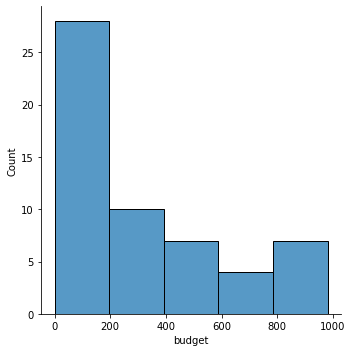

In [42]:
sns.displot(df_movies[df_movies.budget < 1000], x="budget", bins=5)

In [43]:
df_movies['budget_bins'] = pd.cut(x=df_movies['budget'], bins= [0, 500000, 2750000, 7500000, 11000000, 15000000, 50000000, 99999999999999], labels= ["indie", "micro budget", "tier 1 low", "tier 2 low", "tier 3 low", "medium", "high end"])

In [44]:
print(df_movies.budget.count())
df_movies['budget_bins'].value_counts()


8224


micro budget    2127
indie           1862
medium          1312
tier 1 low      1235
high end         790
tier 2 low       617
tier 3 low       281
Name: budget_bins, dtype: int64

In [45]:
df_movies[df_movies['budget_bins'] == "indie"].head(30)

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId,num_of_rating_bins,budget_bins
87,12 Angry Men (1957),120.0,9.0,793000.0,380030.000000,$955,United States,"['Martin Balsam,John Fiedler,Lee J. Cobb,E.G. ...",['Sidney Lumet'],"['Reginald Rose,Reginald Rose']",...,0,0,0,0,0,0,0,1203,super_high,indie
119,Monty Python and the Holy Grail (1975),120.0,8.2,545000.0,171710.777020,"$1,940,906",United Kingdom,"['Graham Chapman,John Cleese,Eric Idle,Terry G...","['Terry Gilliam,Terry Jones']","['Graham Chapman,John Cleese,Eric Idle,Terry G...",...,0,0,0,0,0,0,0,1136,super_high,indie
402,Call Me by Your Name (2017),150.0,7.8,278000.0,49007.317472,"$43,143,046","Italy,France,United States,Brazil","['Armie Hammer,Timothée Chalamet,Michael Stuhl...",['Luca Guadagnino'],"['James Ivory,André Aciman']",...,0,0,0,0,0,0,0,168492,super_high,indie
447,The Blair Witch Project (1999),90.0,6.5,265000.0,65148.000000,"$248,639,099",United States,"['Heather Donahue,Joshua Leonard,Michael C. Wi...","['Daniel Myrick,Eduardo Sánchez']","['Daniel Myrick,Eduardo Sánchez,Heather Donahue']",...,0,0,0,0,0,0,0,2710,super_high,indie
470,Clerks (1994),120.0,7.7,225000.0,29316.600000,"$3,151,130",United States,"[""Brian O'Halloran,Jeff Anderson,Marilyn Ghigl...",['Kevin Smith'],['Kevin Smith'],...,0,0,0,0,0,0,0,223,super_high,indie
480,Napoleon Dynamite (2004),120.0,6.9,223000.0,434320.000000,"$46,138,887",United States,"[""Jon Heder,Jon Gries,Aaron Ruell,Efren Ramire...",['Jared Hess'],"['Jared Hess,Jerusha Hess']",...,0,0,0,0,0,0,0,8376,super_high,indie
526,The Evil Dead (1981),90.0,7.4,213000.0,380030.000000,"$2,895,379",United States,"['Bruce Campbell,Ellen Sandweiss,Richard DeMan...",['Sam Raimi'],['Sam Raimi'],...,0,0,0,0,0,0,0,4105,super_high,indie
539,Mad Max (1979),90.0,6.8,210000.0,325740.000000,"$8,773,197",Australia,"['Mel Gibson,Joanne Samuel,Hugh Keays-Byrne,St...",['George Miller'],"['James McCausland,George Miller,George Miller...",...,0,0,0,0,0,0,0,3702,super_high,indie
621,The Man from Earth (2007),90.0,7.9,189000.0,217160.000000,NaN,United States,"['David Lee Smith,Tony Todd,John Billingsley,E...",['Richard Schenkman'],['Jerome Bixby'],...,0,0,0,0,0,1,0,55908,super_high,indie
685,Pi (1998),90.0,7.3,180000.0,65148.000000,"$3,221,152",United States,"['Sean Gullette,Mark Margolis,Ben Shenkman,Pam...",['Darren Aronofsky'],"['Darren Aronofsky,Darren Aronofsky,Sean Gulle...",...,0,0,0,0,0,0,0,1921,super_high,indie


In [46]:
df_movies['title'].value_counts().head(30)

The Captain's Paradise (1953)                  8
The Price of Milk (2000)                       8
Adventures of Captain Fabian (1951)            8
Casanova (2005)                                4
Sing (2016)                                    2
The Dream Team (2012)                          2
Anna (1987)                                    2
Bruiser (2000)                                 2
Free Fall (2014)                               2
Life of Crime (2013)                           2
Saturn 3 (1980)                                2
Enron: The Smartest Guys in the Room (2005)    2
The Boss (2016)                                2
Deranged (2012)                                2
Dracula (1931)                                 2
Savage (2011)                                  2
American Woman (2019)                          2
Family Life (1971)                             2
Aladdin (1992)                                 2
Eros (2004)                                    2
War of the Worlds (2

In [47]:
df_movies[df_movies.title == "Adventures of Captain Fabian (1951)"]

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId,num_of_rating_bins,budget_bins
19897,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie
19898,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie
19899,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie
19900,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie
19901,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie
19902,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie
19903,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie
19904,Adventures of Captain Fabian (1951),120.0,5.5,376.0,380030.0,NaN,"France,United States","['Errol Flynn,Micheline Presle,Vincent Price,A...","['William Marshall,Robert Florey']","['Errol Flynn,Robert T. Shannon']",...,0,0,0,0,0,0,1,78049,super_low,indie


In [48]:
df_movies.drop_duplicates(subset=['title'], inplace=True)

In [49]:
df_movies['title'].value_counts().head(20)

The Shawshank Redemption (1994)       1
Tattoo (1981)                         1
Danny Says (2015)                     1
Joan of Paris (1942)                  1
Ma and Pa Kettle Go to Town (1950)    1
The Mind of Mr. Soames (1970)         1
Infinity Baby (2017)                  1
The Stars Fell on Henrietta (1995)    1
Law and Order (1953)                  1
The Men Next Door (2012)              1
Puzzle of a Downfall Child (1970)     1
Moonlight (2002)                      1
Alcatraz (2018)                       1
Fine Manners (1926)                   1
Last Minute (2013)                    1
Che vuoi che sia (2016)               1
Fanfare (1958)                        1
Hallelujah I'm a Bum (1933)           1
Return of the Bad Men (1948)          1
Venus and Serena (2012)               1
Name: title, dtype: int64

In [50]:
df_movies[df_movies['year'] == 1960][['title','year']].head(50)

,title,year
159,Dr. Strangelove or: How I Learned to Stop Worr...,1960.0
374,To Kill a Mockingbird (1962),1960.0
409,The Graduate (1967),1960.0
499,Rosemary's Baby (1968),1960.0
508,Butch Cassidy and the Sundance Kid (1969),1960.0
651,The Jungle Book (1967),1960.0
672,Breakfast at Tiffany's (1961),1960.0
675,Planet of the Apes (1968),1960.0
692,Cool Hand Luke (1967),1960.0
709,Mary Poppins (1964),1960.0


In [51]:
gross = df_movies['worldwide_gross']

In [52]:
from forex_python.converter import CurrencyRates
import re
c = CurrencyRates()

#  getting list of currencies
curr = gross.apply(lambda x: re.sub(r'\d+', '', x).replace(',', '') if not pd.isna(x) else None).value_counts()

exchange = pd.DataFrame(columns=['currency', 'rate'])
cname = [
    'USD', 'INR', 'GBP'
    ]
curr.index

Index(['$', '₹', '£'], dtype='object')

In [53]:
#  getting currency rate for every curr in the curr list
rate = {}
for cu in list(curr.index):
    try:
        rate[cu] = c.convert(cname[list(curr.index).index(cu)].strip(), 'USD', 1)
    except:
        rate[cu] = None
rate

{'$': 1.0, '₹': 0.012251829368057006, '£': 1.2287253304363572}

In [54]:
#  converting 'worldwide_gross' column
def change(x):
    if not pd.isna(x):
        try:
            amount = int(re.sub(r'[^0-9]', '', x))
            return amount*rate[re.sub(r'\d+', '', x).replace(',', '')]
        except:
            return None
    else:
        return None
df_movies['worldwide_gross'] = gross.apply(change)

In [55]:
df_movies

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId,num_of_rating_bins,budget_bins
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,2.888450e+07,United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,318,super_high,medium
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,1.006234e+09,"United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...",...,0,0,0,0,0,0,0,58559,super_high,high end
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,8.368481e+08,"United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,79132,super_high,high end
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,1.012097e+08,"Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']",...,0,0,0,0,0,0,0,2959,super_high,high end
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,2.139288e+08,United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...",...,0,0,0,0,0,0,0,296,super_high,tier 2 low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22738,Doggiewoggiez! Poochiewoochiez! (2012),60.0,6.8,182.0,2171.6,NaN,United States,"['Tim Allen,Michael Badalucco,Jim Belushi,Matt...",['nan'],['nan'],...,0,0,0,0,0,0,1,120134,super_low,indie
22739,Bobbikins (1959),90.0,5.0,182.0,NaN,NaN,United Kingdom,"[""Shirley Jones,Max Bygraves,Billie Whitelaw,B...",['Robert Day'],['Oscar Brodney'],...,0,0,0,0,0,0,0,113682,super_low,NaN
22740,Vallen (2001),120.0,5.8,182.0,NaN,NaN,Belgium,"['Lee Williams,Emma Thomas,Alice Krige,Lydia C...",['Hans Herbots'],"['Hans Herbots,John Paul Chapple,Anne Provoost']",...,0,0,0,0,0,0,1,150064,super_low,NaN
22741,Exclusive Story (1936),90.0,6.0,182.0,NaN,NaN,United States,"[""Franchot Tone,Madge Evans,Stuart Erwin,Josep...",['George B. Seitz'],"['Michael Fessier,Martin Mooney']",...,0,0,0,0,0,1,0,150944,super_low,NaN


In [65]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22742
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   title               22696 non-null  object  
 1   runtime             22464 non-null  float64 
 2   imdb_rating         22696 non-null  float64 
 3   num_of_rating       22696 non-null  float64 
 4   budget              8208 non-null   float64 
 5   worldwide_gross     9247 non-null   float64 
 6   origin              22683 non-null  object  
 7   cast                22696 non-null  object  
 8   director            22696 non-null  object  
 9   writer              22696 non-null  object  
 10  producer            22696 non-null  object  
 11  composer            22696 non-null  object  
 12  cinematographer     22696 non-null  object  
 13  editor              22696 non-null  object  
 14  year                22696 non-null  float64 
 15  Action              22696 non-null  

In [58]:
df_movies.head(20)

,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,origin,cast,director,writer,...,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan,movieId,num_of_rating_bins,budget_bins
0,The Shawshank Redemption (1994),150.0,9.3,2700000.0,27145000.0,2.888450e+07,United States,"['Tim Robbins,Morgan Freeman,Bob Gunton,Willia...",['Frank Darabont'],"['Stephen King,Frank Darabont']",...,0,0,0,0,0,0,0,318,super_high,medium
1,The Dark Knight (2008),180.0,9.0,2700000.0,200873000.0,1.006234e+09,"United States,United Kingdom","[""Christian Bale,Heath Ledger,Aaron Eckhart,Mi...",['Christopher Nolan'],"['Jonathan Nolan,Christopher Nolan,Christopher...",...,0,0,0,0,0,0,0,58559,super_high,high end
2,Inception (2010),150.0,8.8,2400000.0,173728000.0,8.368481e+08,"United States,United Kingdom","['Leonardo DiCaprio,Joseph Gordon-Levitt,Ellio...",['Christopher Nolan'],['Christopher Nolan'],...,0,0,0,0,0,0,0,79132,super_high,high end
3,Fight Club (1999),150.0,8.8,2100000.0,68405400.0,1.012097e+08,"Germany,United States","[""Edward Norton,Brad Pitt,Meat Loaf,Zach Greni...",['David Fincher'],"['Chuck Palahniuk,Jim Uhls']",...,0,0,0,0,0,0,0,2959,super_high,high end
4,Pulp Fiction (1994),180.0,8.9,2100000.0,8686400.0,2.139288e+08,United States,"['Tim Roth,Amanda Plummer,Laura Lovelace,John ...",['Quentin Tarantino'],"['Quentin Tarantino,Roger Avary,Quentin Tarant...",...,0,0,0,0,0,0,0,296,super_high,tier 2 low
5,Forrest Gump (1994),150.0,8.8,2100000.0,59719000.0,6.782265e+08,United States,"[""Tom Hanks,Rebecca Williams,Sally Field,Micha...",['Robert Zemeckis'],"['Winston Groom,Eric Roth']",...,0,0,0,0,0,0,0,356,super_high,high end
6,The Matrix (1999),150.0,8.7,1900000.0,68405400.0,4.672227e+08,"United States,Australia","[""Keanu Reeves,Laurence Fishburne,Carrie-Anne ...","['Lana Wachowski,Lilly Wachowski']","['Lilly Wachowski,Lana Wachowski']",...,0,0,0,0,0,0,0,2571,super_high,high end
7,The Lord of the Rings: The Fellowship of the R...,180.0,8.8,1900000.0,100979400.0,8.982044e+08,"New Zealand,United States","[""Alan Howard,Noel Appleby,Sean Astin,Sala Bak...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,4993,super_high,high end
8,The Godfather (1972),180.0,9.2,1900000.0,6514800.0,2.503418e+08,United States,"['Marlon Brando,Al Pacino,James Caan,Richard S...",['Francis Ford Coppola'],"['Mario Puzo,Francis Ford Coppola,Mario Puzo']",...,0,0,0,0,0,0,0,858,super_high,tier 1 low
9,The Lord of the Rings: The Return of the King ...,NaN,9.0,1900000.0,102065200.0,1.146458e+09,"New Zealand,United States","['Noel Appleby,Ali Astin,Sean Astin,David Asto...",['Peter Jackson'],"['J.R.R. Tolkien,Fran Walsh,Philippa Boyens,Pe...",...,0,0,0,0,0,0,0,7153,super_high,high end


In [66]:
df_movies.to_csv('movies_cleaned.csv')

In [60]:
df_ratings = final_number

In [61]:
df_ratings.sort_values(by='movieId', inplace=True)

C:\Users\Kevan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [62]:
df_ratings

,userId,movieId,rating
22682008,147413,1,3.5
15931427,103254,1,3.0
785756,5320,1,5.0
185481,1317,1,3.0
4523672,29725,1,3.5
...,...,...,...
6048882,39183,208941,3.0
14274070,92412,208943,2.0
13009941,84238,209041,3.0
2278203,15152,209053,3.5


In [63]:
df_ratings['movieId'].value_counts()

356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
162636        1
162644        1
162710        1
162854        1
209145        1
Name: movieId, Length: 21546, dtype: int64

In [64]:
df_ratings.to_csv('ratings_cleaned')